Programming Tasks (50 points):

Write python scripts to complete the following tasks. You will need to submit these scripts on github.

A.) Data Description
A.1. Characterize the mean, meadian and standard deviation of all variables in your dataset relevant to your hypothesis.
A.2. Create Histograms of each relevant variable.
B.) Correlation
B.1. Calculate Pearson and Spearman Correlation Coefficients between key variables relevant to your hypothesis.
B.2. Conduct Linear regression on the above variable sets.
B.3. Generate scatter plots of real data with linear regression lines overlaid
C.) Dimensionality reduction
C.1. Conduct Principle Components Analysis using all quantitative variables in your data set for across all samples.
C.2. Extract principle component weights and plot using a bar chart.
C.3. Visualize your data on PC1 and PC2. Color code data points by relevant categories.

PFAS_2019 [12.8, 2.5, 257.7, 1.2, 125.6, 3.4, 12.8, 6.0, 4.2, 3.5, 9.4]
PFAS_2021 [1.7, 1.7, 1.7, 3.8, 34.2, 16.9, 10.5, 3.7, 3.8, 2.3, 2.0]


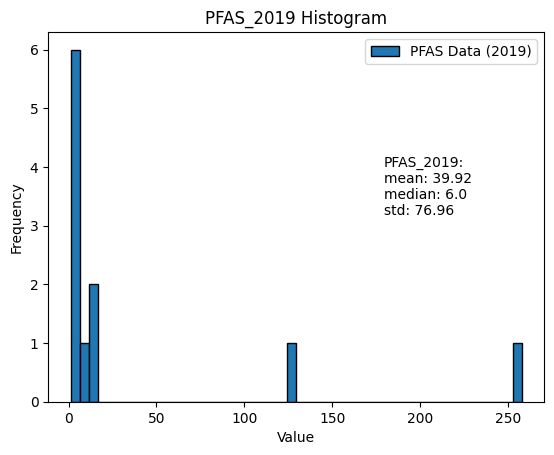

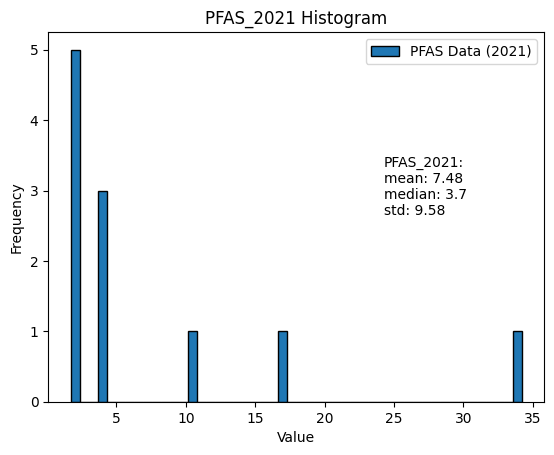

Slope: -7.970000000000001
Intercept: 87.73818181818183
R-squared value: 0.10723664211218167
P-value: 0.32558597204910966
Standard error: 7.665379164858502


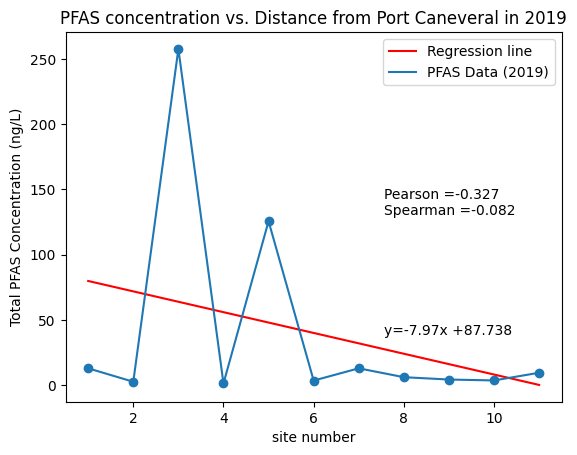

Slope: -0.12454545454545465
Intercept: 8.22909090909091
R-squared value: 0.0016889168040428203
P-value: 0.9045071878946167
Standard error: 1.0093352602504981


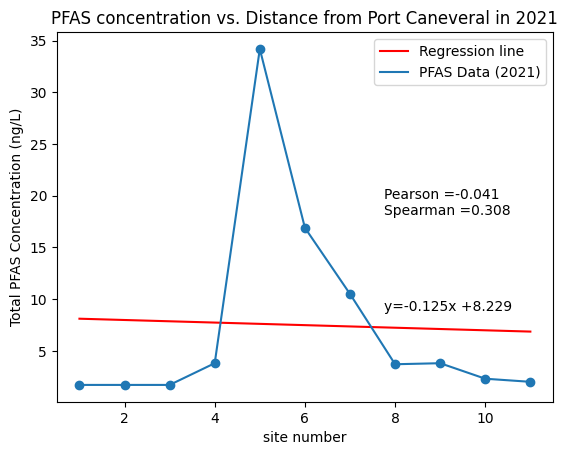

Text(0, 0.5, 'PC2: PFAS Species Concentrations (4.59%)')

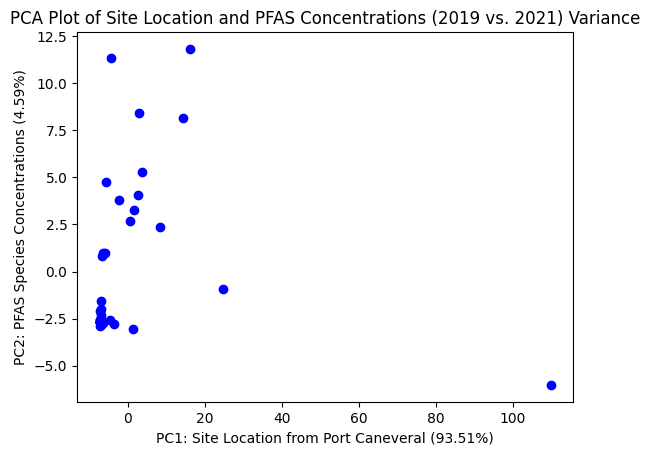

In [24]:
#Import ENV3040C_PFAS_DATA and format into np_array
import sys
import numpy as np
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
file = open("ENV3040C_PFAS_DATA.csv")

#instatiate lists for counting the total concentration of PFAS at each site location (1-11) in both 2019 and 2021
sites = [1,2,3,4,5,6,7,8,9,10,11]
PFAS_2019 = [0,0,0,0,0,0,0,0,0,0,0]
PFAS_2021 = [0,0,0,0,0,0,0,0,0,0,0]
samples = []
first = True

#iterate through the csv file, line by line, and split the row at each column, remove the first index (the names of each PFAS species), 
# and the last index (the total concentration of one PFASs species across all sites), as we wont be using them in this analysis. 
for line in file:
    if first == True:
        first=False
    else:
        data = line.split(",")
        #remove row information before converting into np.array
        del data[0:1]
        #remove the last element in each row
        del data[-1]
        #append data list to samples aray
        samples.append(data)
        
#convert samples array into np_array
np_array = np.array(samples)

#seperate the values from the main np_array into two smaller arrays for the PFAS concentration taken of each species in 2019 and 2021
for data in np_array:
    #determine whether the data is from 2019 or 2021 by taking the first element (the year) and checking to see if it's equal to 2019 or 2021
    if data[0] == '2019':
        count = 0
        for i in data[1:]:
            PFAS_2019[count] += round(float(i),2)
            count+=1
    elif data[0] == '2021':
        count = 0
        for i in data[1:]:
            PFAS_2021[count] += round(float(i),2)
            count+=1

#clean data in both arrays by takign each element and rounding it to two decimal places
PFAS_2019 = [round(x, 2) for x in PFAS_2019]
PFAS_2021 = [round(x, 2) for x in PFAS_2021]

#print our new total concentrations for PFAS at each sampling location in 2019 and 2021
print("PFAS_2019",PFAS_2019)
print("PFAS_2021",PFAS_2021)

#A.1) Mean, Median, and Standard Deviation of PFAS_2019 and PFAS_2021 
#use numpy functions to find the mean, median, and standard deviation of PFAS_2019 data
mean_19 = np.mean(PFAS_2019)
median_19 = np.median(PFAS_2019)
stdev_19 = np.std(PFAS_2019)

#use numpy functions to find the mean, median, and standard deviation of PFAS_2021 data
mean_21 = np.mean(PFAS_2021)
median_21 = np.median(PFAS_2021)
stdev_21 = np.std(PFAS_2021)

#concatinate the mean, median, and std. values into a string that will be annotated onto the histogram plot for this data to make it easier for the reader to understand.
anno_2019 = "PFAS_2019:\n" + "mean: " + str(round(mean_19,2)) + "\nmedian: " + str(round(median_19,2)) + "\nstd: " + str(round(stdev_19,2))
anno_2021 = "PFAS_2021:\n" + "mean: " + str(round(mean_21,2)) + "\nmedian: " + str(round(median_21,2)) + "\nstd: " + str(round(stdev_21,2))

#A.2) Create Histograms of PFAS_2019 and PFAS_2021 
#plot the labels, annotations, and legend, for the PFAS_2019 histogram
plt.hist(PFAS_2019, bins = 50, edgecolor='black', label='PFAS Data (2019)')
plt.title('PFAS_2019 Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.annotate(anno_2019,xy=(0.6,0.5),xycoords='figure fraction')
plt.legend()
plt.show()

#plot the labels, annotations, and legend, for the PFAS_2021 histogram
plt.hist(PFAS_2021, bins = 50, edgecolor='black', label='PFAS Data (2021)')
plt.title('PFAS_2021 Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.annotate(anno_2021,xy=(0.6,0.5),xycoords='figure fraction')
plt.legend()
plt.show()

#B.1) Calculate Pearson and Spearman Correlation Coefficients between PFAS concentrations and their distance from Port Caneveral (sites 1 to 11)
#parse in site and PFAS_2019 data as float datatypes in order to calculate the slope on the regression line
sites = np.array(sites, dtype=float)
PFAS_2019 = np.array(PFAS_2019, dtype=float)

#instantiate plot
pearson = stats.pearsonr(sites,PFAS_2019)
spearman = stats.spearmanr(sites,PFAS_2019)
print_correleation = "Pearson =" + str(round(pearson.statistic,3)) + "\n" + "Spearman =" + str(round(spearman.statistic,3))

#B.2) Conduct Linear regression on the PFAS_2019 variable sets.\
slope, intercept, r_value, p_value, std_err = linregress(sites,PFAS_2019)

# Generate predicted y values (regression line)
y_pred = slope * sites + intercept

#print regression results (for reference)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
#concatinate linear slope equatiuon into a string that will be annotated onto the linear regression plot for this data to make it easier for the reader to understand.
annotate = "y=" + str(round(slope,3)) + "x +" + str(round(intercept,3))

#B.3) Generate scatter plots of real data with linear regression lines overlaid
#populate scatterplot with x = sites and y  = PFAS_2019
fig, ax = plt.subplots()
ax.scatter(sites,PFAS_2019)

# Plot the scatterplot data (with legend), regression line (with equation), and Pearson/Spearman corrrelation coefficients.
plt.plot(sites, y_pred, color='red', label='Regression line')
plt.annotate(annotate,xy=(0.6,0.25),xycoords='figure fraction')
plt.annotate(print_correleation,xy=(0.6,0.5),xycoords='figure fraction')
ax.plot(sites,PFAS_2019, label='PFAS Data (2019)')
plt.legend()

#label both x and y axis and title the graph
ax.set_xlabel("site number")
ax.set_ylabel("Total PFAS Concentration (ng/L)")
ax.set_title("PFAS concentration vs. Distance from Port Caneveral in 2019")

#show plot
plt.show()

#B.1) Calculate Pearson and Spearman Correlation Coefficients between PFAS concentrations and their distance from Port Caneveral (sites 1 to 11)
#parse in site and PFAS_2019 data as float datatypes in order to calculate the slope on the linear regression
PFAS_2021 = np.array(PFAS_2021, dtype=float)

#instantiate plot
pearson = stats.pearsonr(sites,PFAS_2021)
spearman = stats.spearmanr(sites,PFAS_2021)
print_correleation = "Pearson =" + str(round(pearson.statistic,3)) + "\n" + "Spearman =" + str(round(spearman.statistic,3))

#B.2) Conduct Linear regression on the PFAS_2021 variable sets.
slope, intercept, r_value, p_value, std_err = linregress(sites,PFAS_2021)

# Generate predicted y values (regression line)
y_pred = slope * sites + intercept

# Print regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
annotate = "y=" + str(round(slope,3)) + "x +" + str(round(intercept,3))

#B.3) Generate scatter plots of real data with linear regression lines overlaid
#populate scatterplot with x = sites and y  = PFAS_2021
fig, ax = plt.subplots()
ax.scatter(sites,PFAS_2021)

# Plot the regression line (with equation) and scatterplot data (with legend)
plt.plot(sites, y_pred, color='red', label='Regression line')
plt.annotate(annotate,xy=(0.6,0.3),xycoords='figure fraction')
plt.annotate(print_correleation,xy=(0.6,0.5),xycoords='figure fraction')
ax.plot(sites,PFAS_2021, label='PFAS Data (2021)')
plt.legend()

#label both x and y axis and title the graph
ax.set_xlabel("site number")
ax.set_ylabel("Total PFAS Concentration (ng/L)")
ax.set_title("PFAS concentration vs. Distance from Port Caneveral in 2021")

#show plot
plt.show()

#C.1) Conduct Principle Components Analysis using all quantitative variables in your data set for across all samples.
#fit the PCA model to the data
pca = PCA(n_components=2)

#for data in np_array:
#example array
principal_conponents = pca.fit_transform(np_array)
#print(pca.explained_variance_ratio_)
#print(principal_conponents)

#C.2) Extract principle component weights and plot using a bar chart.
    #decided not to do this as it was not covered in the course material
#C.3) Visualize your data on PC1 and PC2. Color code data points by relevant categories.
#generate plot
fig, ax = plt.subplots()
ax.scatter(principal_conponents[: , 0],principal_conponents[: , 1], c="blue")

#set axis labels
Label_X = "PC1: Site Location from Port Caneveral (" + str(np.round(pca.explained_variance_ratio_[0]*100, decimals=2)) + "%)"
Label_Y = "PC2: PFAS Species Concentrations (" + str(np.round(pca.explained_variance_ratio_[1]*100, decimals=2)) + "%)"
ax.set_title("PCA Plot of Site Location and PFAS Concentrations (2019 vs. 2021) Variance")
ax.set_xlabel(Label_X)
ax.set_ylabel(Label_Y)
